# MALWARE DATA COLLECTION AND MACHINE LEARNING ANALYSIS.
- Akshay Godugu (G01061979)

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
import warnings
import keras
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("FINAL1.csv")
df = df.drop('Unnamed: 0',1)

In [5]:
df.head()

,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,L1-icache-load-misses,LLC-load-misses,LLC-loads,branch-instructions,branch-loads,branch-misses,bus-cycles,cache-misses,cache-references,class,iTLB-load-misses,instructions,node-loads,node-stores
0,501.0,7544.0,3789.0,724.0,276.0,472.0,6685.0,7034.0,387.0,1672.0,11.0,2241.0,benign,66.0,21039.0,9.0,0.0
1,108962.0,14514092.0,7626672.0,21723.0,554.0,20920.0,12993715.0,13536037.0,35425.0,927675.0,702.0,41220.0,benign,59.0,54427078.0,647.0,30.0
2,2984.0,28610.0,19567.0,1444.0,275.0,1300.0,16456.0,16890.0,549.0,3661.0,312.0,4134.0,benign,91.0,88352.0,252.0,56.0
3,502.0,7527.0,3834.0,722.0,270.0,446.0,4926.0,7016.0,395.0,1589.0,14.0,2150.0,benign,63.0,21117.0,7.0,0.0
4,205461.0,3909594.0,2402954.0,228774.0,64.0,60749.0,1590680.0,3131682.0,15346.0,145977.0,573.0,75145.0,benign,1014.0,6857679.0,425.0,82.0


### DATA INFO CHECK

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7170 entries, 0 to 7169
Data columns (total 17 columns):
L1-dcache-load-misses    7170 non-null float64
L1-dcache-loads          7170 non-null float64
L1-dcache-stores         7170 non-null float64
L1-icache-load-misses    7170 non-null float64
LLC-load-misses          7170 non-null float64
LLC-loads                7170 non-null float64
branch-instructions      7170 non-null float64
branch-loads             7170 non-null float64
branch-misses            7170 non-null float64
bus-cycles               7170 non-null float64
cache-misses             7170 non-null float64
cache-references         7170 non-null float64
class                    7170 non-null object
iTLB-load-misses         7170 non-null float64
instructions             7170 non-null float64
node-loads               7170 non-null float64
node-stores              7170 non-null float64
dtypes: float64(16), object(1)
memory usage: 952.3+ KB


### NULL VALUES

In [7]:
df.isnull().sum()

L1-dcache-load-misses    0
L1-dcache-loads          0
L1-dcache-stores         0
L1-icache-load-misses    0
LLC-load-misses          0
LLC-loads                0
branch-instructions      0
branch-loads             0
branch-misses            0
bus-cycles               0
cache-misses             0
cache-references         0
class                    0
iTLB-load-misses         0
instructions             0
node-loads               0
node-stores              0
dtype: int64

### Check the stats of data

In [8]:
df.describe()

,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,L1-icache-load-misses,LLC-load-misses,LLC-loads,branch-instructions,branch-loads,branch-misses,bus-cycles,cache-misses,cache-references,iTLB-load-misses,instructions,node-loads,node-stores
count,7.170000e+03,7.170000e+03,7.170000e+03,7170.000000,7170.000000,7170.000000,7.170000e+03,7.170000e+03,7170.000000,7.170000e+03,7170.000000,7.170000e+03,7.170000e+03,7.170000e+03,7170.000000,7170.000000
mean,1.111066e+05,2.713333e+06,3.783521e+06,56367.129275,4154.960396,33600.782389,2.058213e+06,2.093171e+06,32001.414621,2.346752e+05,9540.647997,7.755578e+04,3.491315e+04,1.020301e+07,4468.095685,1680.437804
std,2.397261e+05,4.652127e+06,4.641834e+06,75932.562718,9215.971604,59557.339752,3.895270e+06,3.916363e+06,55043.538454,3.326109e+05,14876.461327,1.293462e+05,1.116533e+05,1.766334e+07,9957.434837,4841.330511
min,0.000000e+00,0.000000e+00,0.000000e+00,210.000000,0.000000,125.000000,4.040000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000,3.900000e+02,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.063850e+04,2.754675e+04,4.055310e+04,8639.000000,420.107749,5255.745537,1.040578e+05,1.551825e+04,3379.500000,2.137225e+04,1580.250000,5.692139e+03,3.920000e+02,4.982390e+05,318.000000,44.761259
50%,2.412265e+04,7.876922e+05,1.182998e+06,28068.580770,1324.994536,10282.714094,2.790713e+05,2.865197e+05,13550.971529,8.366320e+04,5411.880655,2.365225e+04,1.257887e+03,2.743176e+06,1356.000000,214.000000
75%,7.177669e+04,1.845572e+06,6.540336e+06,68505.222276,3176.756095,27880.964798,7.014363e+05,8.457159e+05,24617.821459,1.901907e+05,10964.661838,7.013866e+04,4.718250e+03,5.908249e+06,3154.345101,924.869479
max,3.661031e+06,3.447474e+07,1.700000e+07,763649.000000,134186.000000,647920.000000,2.418764e+07,2.301356e+07,957677.000000,2.734836e+06,236095.000000,1.477066e+06,1.593968e+06,1.153164e+08,133001.000000,137188.000000


### Check the class distribution

In [9]:
df['class'].value_counts()

benign     3720
malware    3450
Name: class, dtype: int64

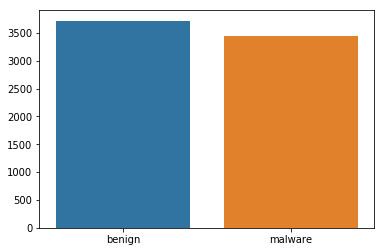

In [10]:
sns.barplot(df['class'].value_counts().index, df['class'].value_counts().values)

### Correlation Analysis

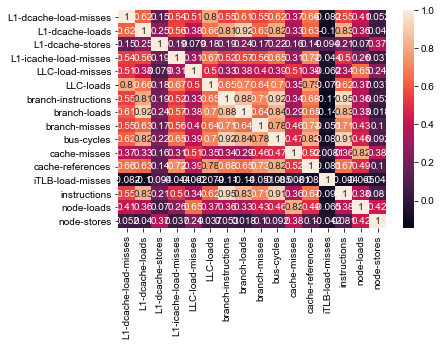

In [11]:
sns.heatmap(df.corr(), annot=True)
sns.set(rc={'figure.figsize':(12,7)})

### Pairplot to look up relation between every attribute

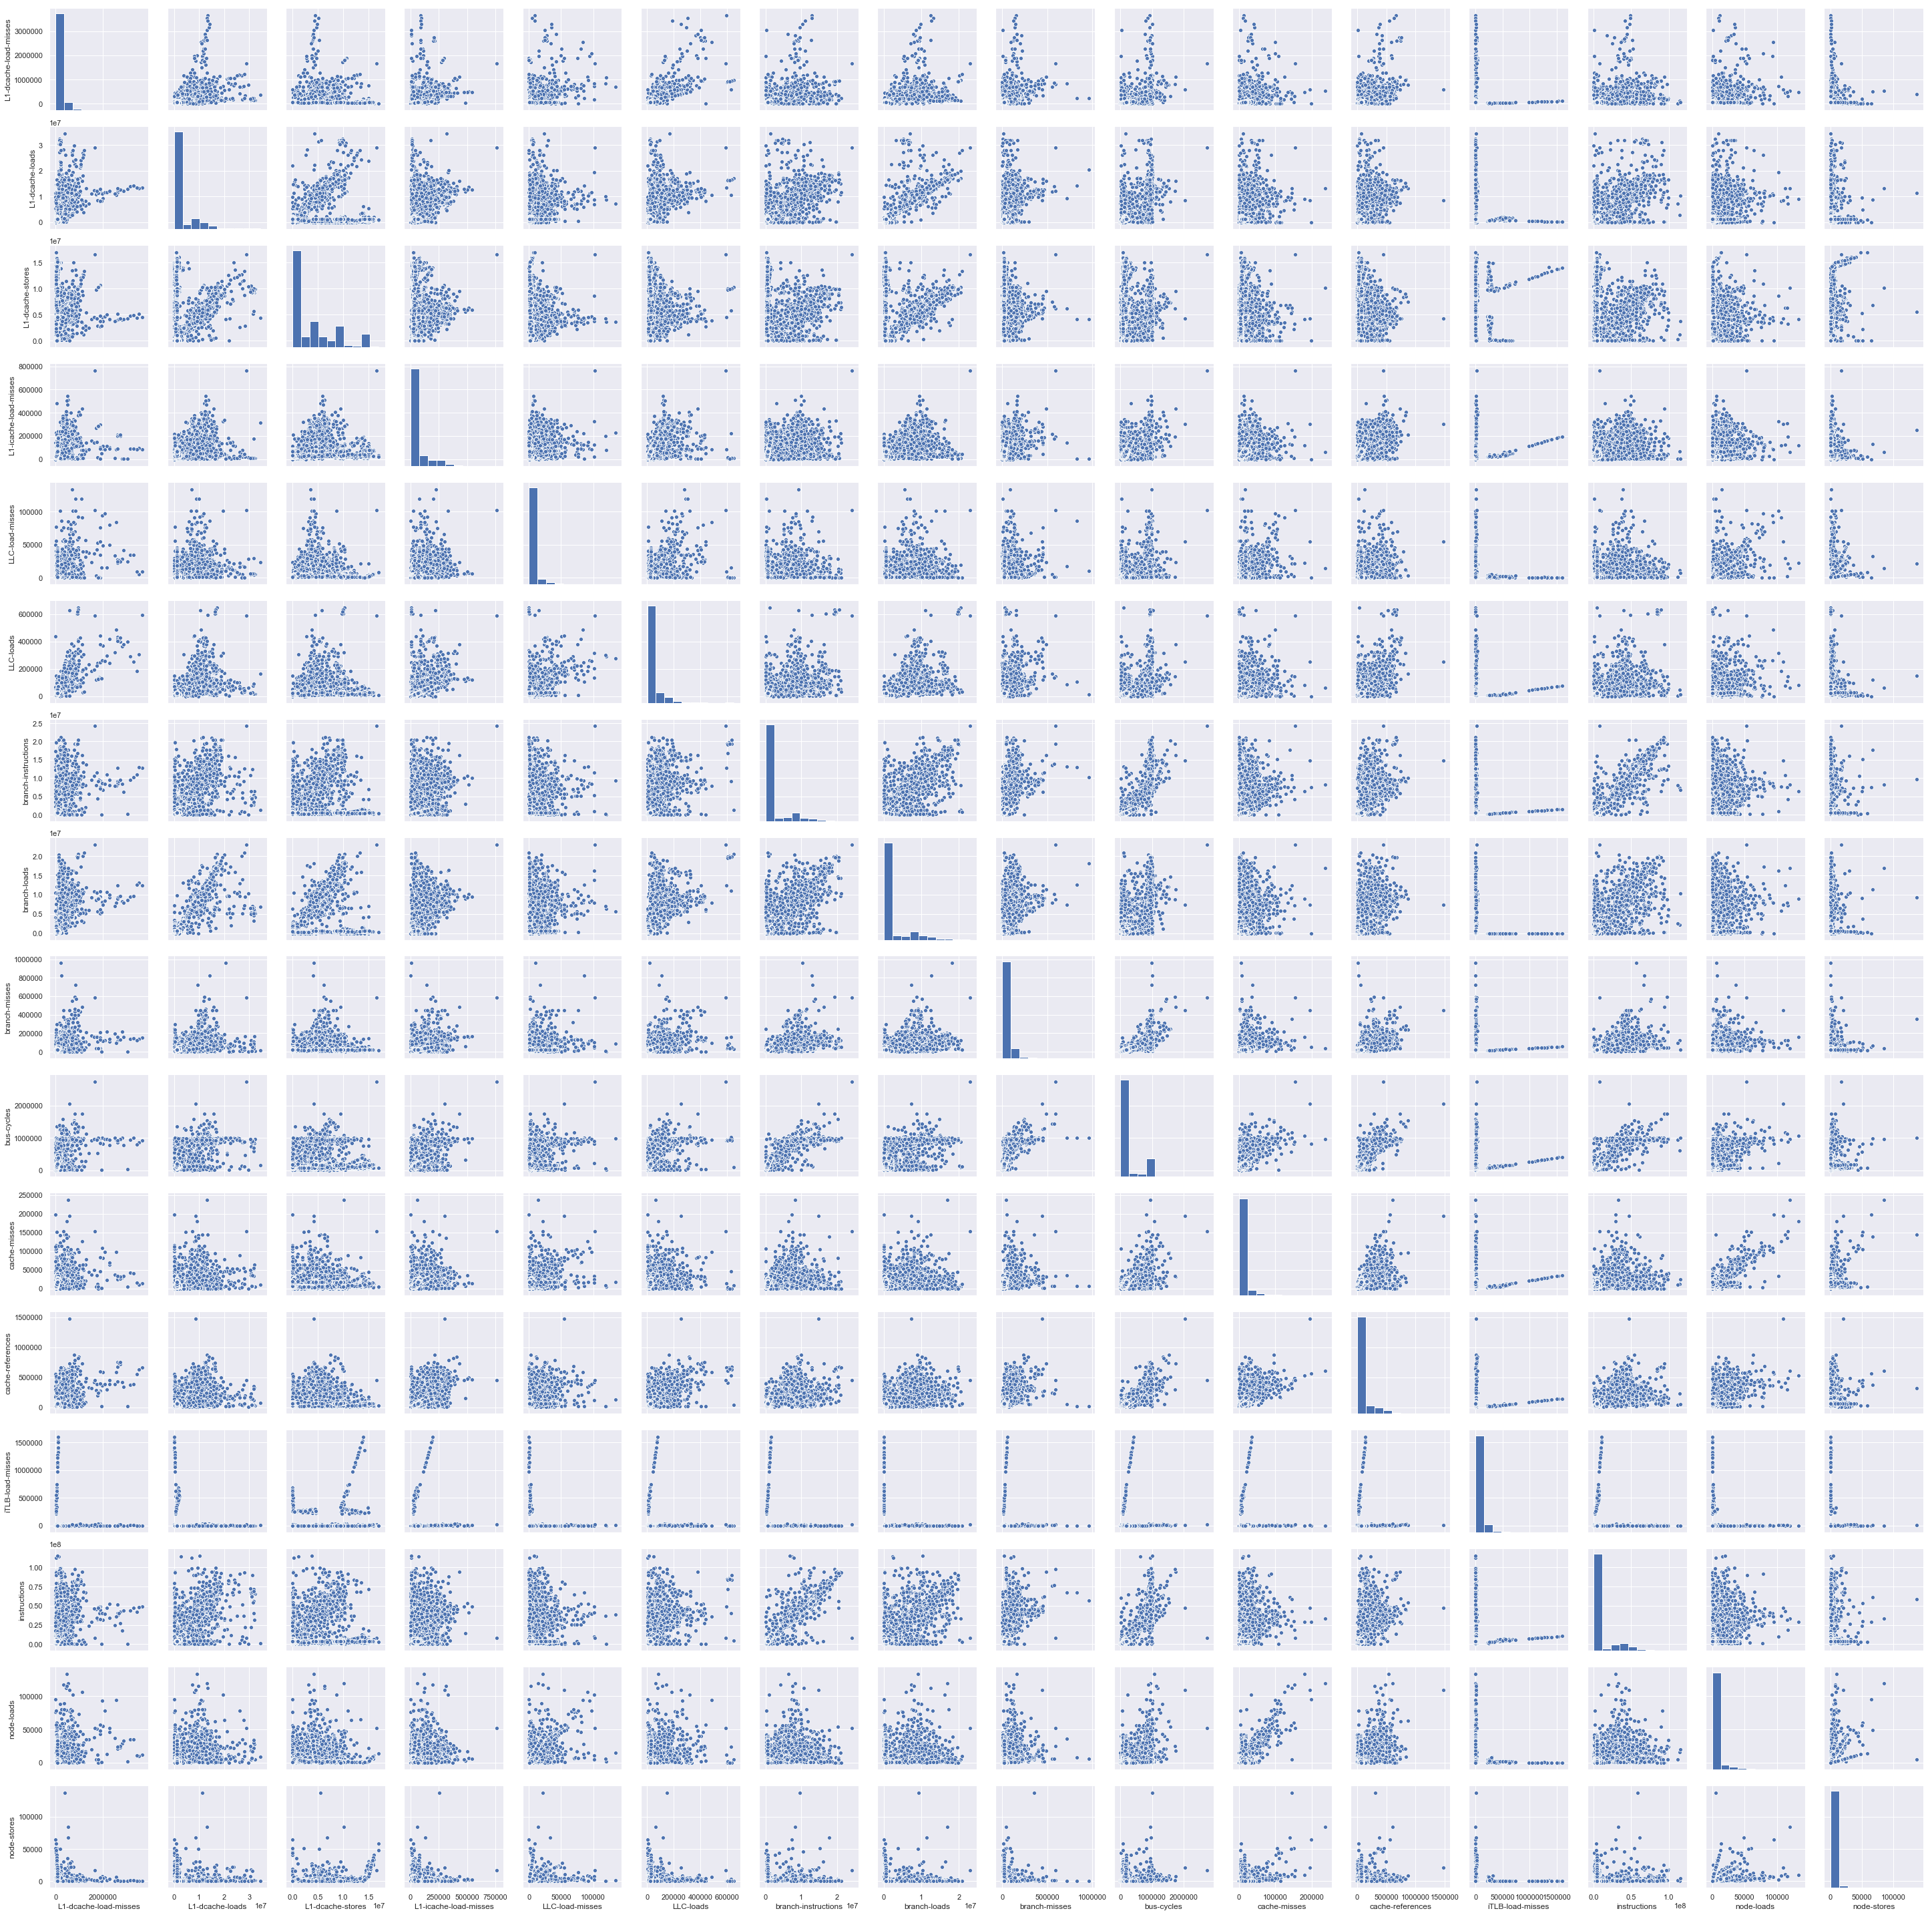

In [12]:
sns.pairplot(df)
#sns.set(rc={'figure.figsize':(12,7)})

### The scatter plot between L1-dcache-loads and L1-dcache-load-misses

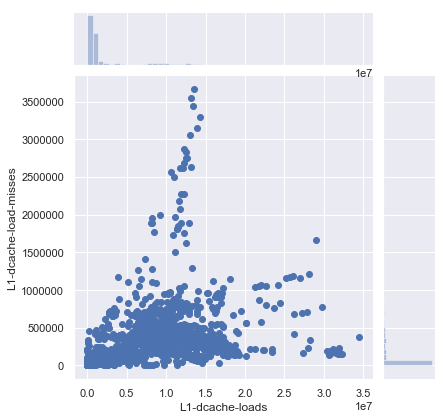

In [13]:
sns.jointplot(df['L1-dcache-loads'],df['L1-dcache-load-misses'])
sns.set(rc={'figure.figsize':(12,7)})

### The regression plot between bus-cycles and instructions

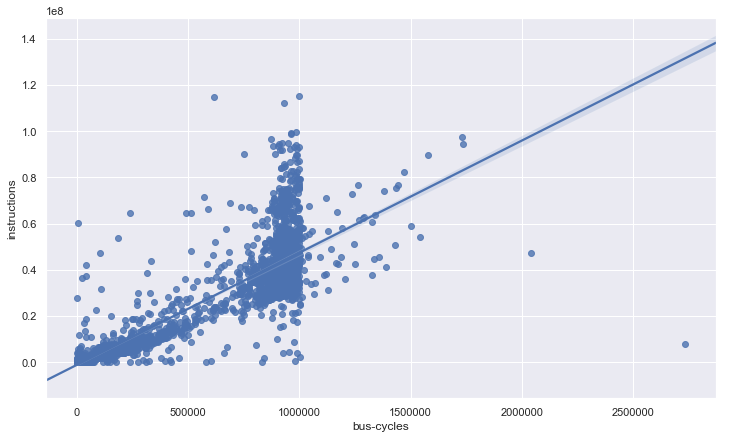

In [14]:
sns.regplot(df['bus-cycles'],df['instructions'])
sns.set(rc={'figure.figsize':(12,7)})

### Histogram for branch-misses
- It has a gaussian distribution

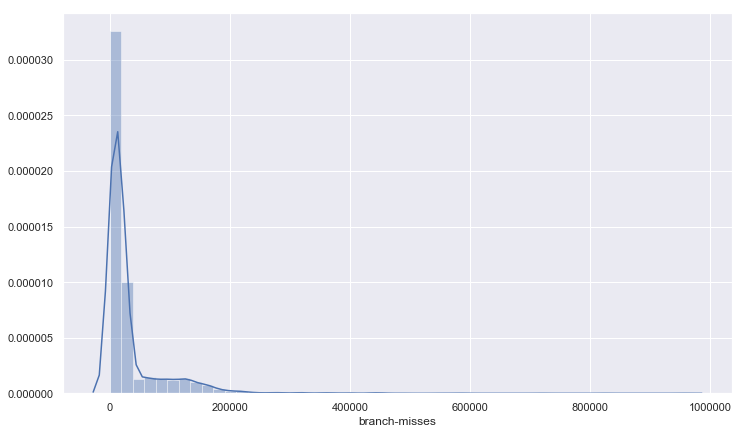

In [15]:
sns.distplot(df['branch-misses'])

### Histogram for instructions and branch-instructions.

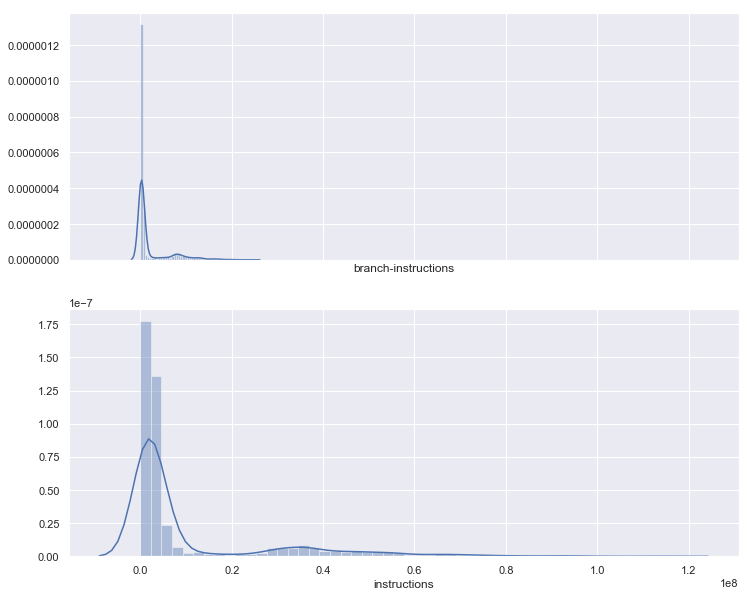

In [16]:
f, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
sns.distplot(df['branch-instructions'],ax=axes[0])
sns.distplot(df['instructions'],ax=axes[1])

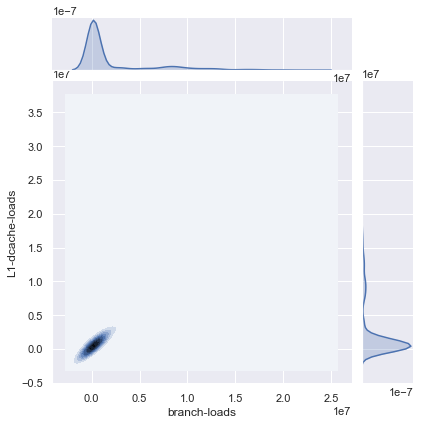

In [17]:
sns.jointplot(df['branch-loads'],df['L1-dcache-loads'], kind = "kde")

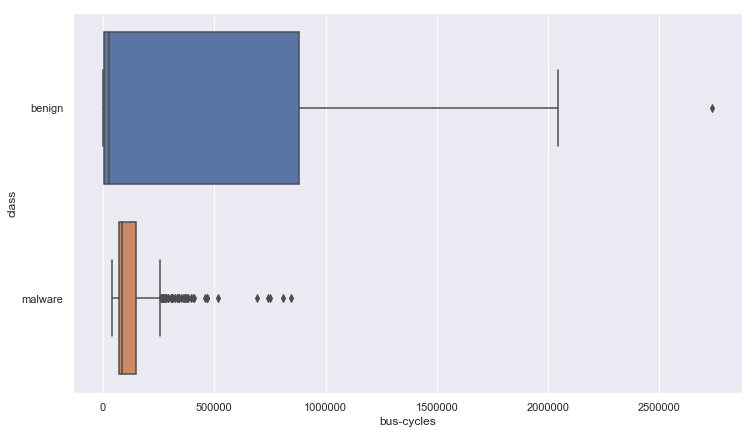

In [18]:
ax = sns.boxplot(x='bus-cycles',y="class",data=df)
sns.set(rc={'figure.figsize':(8,4)})

### Features and Label preparation

In [19]:
feat = df.drop('class',1)
label = df['class']

In [20]:
feat.shape

(7170, 16)

In [21]:
label.shape

(7170,)

### Split the data to train and test set.

In [22]:
xtr,xts,ytr,yts = train_test_split(feat,label)

In [23]:
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(5377, 16)
(1793, 16)
(5377,)
(1793,)


### Logistic Regression

In [24]:
log = LogisticRegression()

In [58]:
log.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_pred = log.predict(xts)

In [62]:
print("Accuracy on LogisticRegression",accuracy_score(y_pred,yts) )

Accuracy on LogisticRegression 0.8170552147239264


#### Confusion Matrix for Logistic Regression

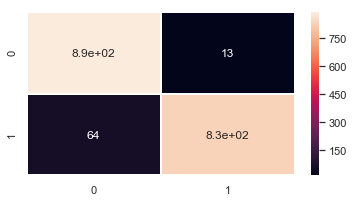

In [28]:
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_pred,yts), annot=True, linewidths=.8)

### Random Forest Classifier

In [29]:
rfe = RandomForestClassifier()

In [55]:
rfe.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_pred = rfe.predict(xts)

In [57]:
print("Accuracy on Random Forest Classifier",accuracy_score(y_pred,yts) )

Accuracy on Random Forest Classifier 0.9172113775794758


#### Confusion Matrix for Random Forest Classifier

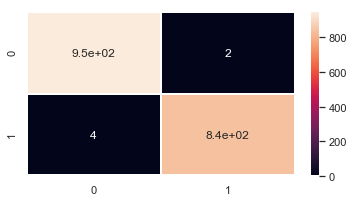

In [33]:
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_pred,yts), annot=True, linewidths=.8)

### Light GBM

In [34]:
gbm = lgb.LGBMClassifier(objective="binary",n_estimators=10000)

In [51]:
gbm.fit(xtr,ytr,verbose = 300)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10000, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [52]:
y_pred = gbm.predict(xts)

In [53]:
print("Accuracy on Light GBM",accuracy_score(y_pred,yts) )

Accuracy on Light GBM 0.9788845510317903


#### Confusion Matrix for Light GBM

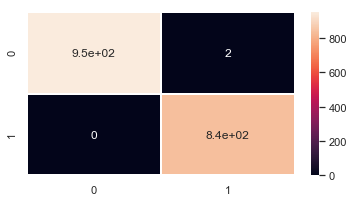

In [38]:
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_pred,yts), annot=True, linewidths=.8)

### NEURAL NETWORK

#### Scale them to range (0,1), because gradients converge quickly.

In [39]:
scale = MinMaxScaler()
xtrk = scale.fit_transform(xtr.values)
xtsk = scale.fit_transform(xts.values)

In [43]:
ytr = ytr.replace({'malware':1,'benign':0})
yts = yts.replace({'malware':1,'benign':0})

In [44]:
#final.target= final.target.replace({'malware':1,'benign':0})

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1250,activation = 'relu'))
model.add(keras.layers.Dense(800,activation = 'relu'))
model.add(keras.layers.Dense(350,activation = 'relu'))

model.add(keras.layers.Dense(2,activation = 'softmax'))
model.compile(optimizer = 'Adagrad',loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(xtrk,ytr.values,epochs = 3,verbose = 1)

Epoch 1/3
5377/5377 [==============================] - 4s 654us/step - loss: 0.1324 - acc: 0.9498
Epoch 2/3
5377/5377 [==============================] - 2s 306us/step - loss: 0.0215 - acc: 0.9940
Epoch 3/3
5377/5377 [==============================] - 2s 307us/step - loss: 0.0130 - acc: 0.9970


In [47]:
print("Accuracy using Keras",model.evaluate(xtsk,yts)[1])

1793/1793 [==============================] - 0s 90us/step
Accuracy using Keras 0.9633073061907418


#### Confusion Matrix for Neural Networks

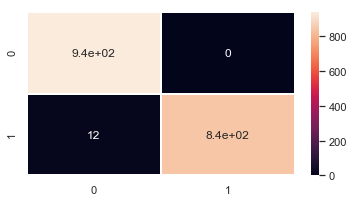

In [54]:
y_pred = np.argmax(model.predict(xtsk),1)
sns.heatmap(confusion_matrix(y_pred,yts), annot=True, linewidths=.8)

### Important features of Random Forest Classifier

In [80]:
rfe.feature_importances_

array([0.07065429, 0.10003872, 0.03080103, 0.0727594 , 0.00130269,
       0.11139022, 0.14461268, 0.11656328, 0.12049924, 0.07282709,
       0.13056509, 0.00618416, 0.00638169, 0.01119976, 0.0027062 ,
       0.00151447])

In [82]:
rfeimp = pd.DataFrame({'col': feat.columns, 'impor': rfe.feature_importances_})
rfeimp = rfeimp.sort_values('impor',ascending=False)

In [83]:
rfeimp

,col,impor
6,branch-instructions,0.144613
10,cache-misses,0.130565
8,branch-misses,0.120499
7,branch-loads,0.116563
5,LLC-loads,0.111390
1,L1-dcache-loads,0.100039
9,bus-cycles,0.072827
3,L1-icache-load-misses,0.072759
0,L1-dcache-load-misses,0.070654
2,L1-dcache-stores,0.030801


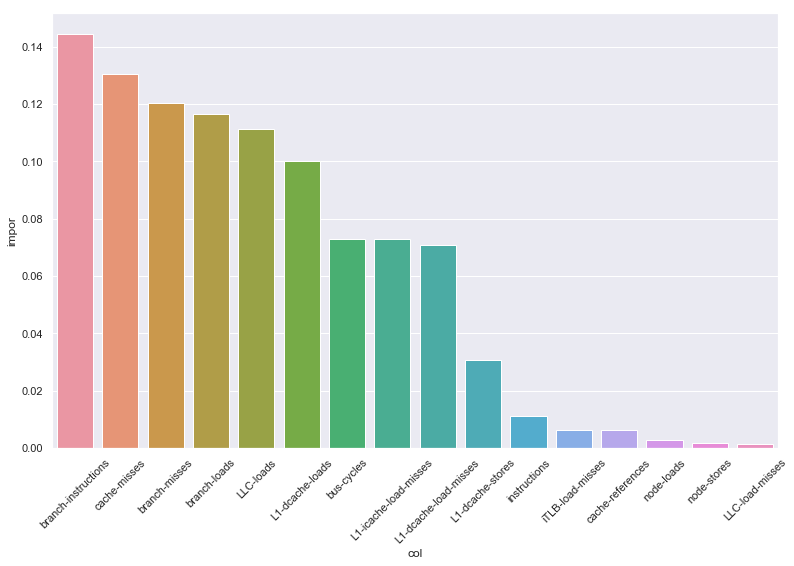

In [89]:
sns.set(rc={'figure.figsize':(13,8)})
plot1 =  sns.barplot('col','impor',data = rfeimp).set_xticklabels(rfeimp.col,rotation=45)

#### Important features of Light GBM

In [84]:
gbm.feature_importances_

array([ 308,  373,  468,  367,  250,  396,  295,  498, 1123,  264,  561,
        479,  371, 7213,  590,  258])

In [85]:
gbmimp = pd.DataFrame({'col': feat.columns, 'impor': gbm.feature_importances_})
gbmimp = gbmimp.sort_values('impor',ascending=False)

In [86]:
gbmimp

,col,impor
13,instructions,7213
8,branch-misses,1123
14,node-loads,590
10,cache-misses,561
7,branch-loads,498
11,cache-references,479
2,L1-dcache-stores,468
5,LLC-loads,396
1,L1-dcache-loads,373
12,iTLB-load-misses,371


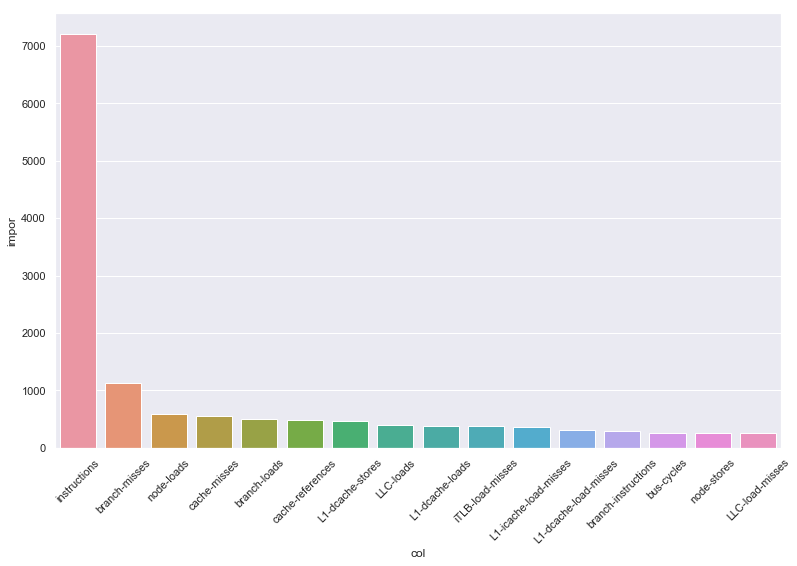

In [88]:
sns.set(rc={'figure.figsize':(13,8)})
plot1 =  sns.barplot('col','impor',data = gbmimp).set_xticklabels(gbmimp.col,rotation=45)

### THE END